### Vidya Avhad

### Task 2

## Supervised Machine Learning

#### In this task we have to predict the percentage of marks of an student based on the number of study hours.                                        In this data "Scores" is a dependent variable and "Hours" is independent variable.


In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
##import data
data=pd.read_csv("http://bit.ly/w-data",header=0)

In [11]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Basic statistics of data

In [12]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Visualization

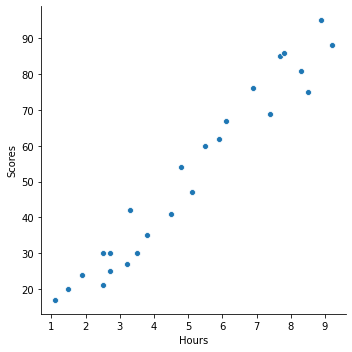

In [17]:
sns.relplot(x="Hours",y="Scores",data=data)

#### From above scatter plot we say that there is positive linear relationship between Hours and Scores.

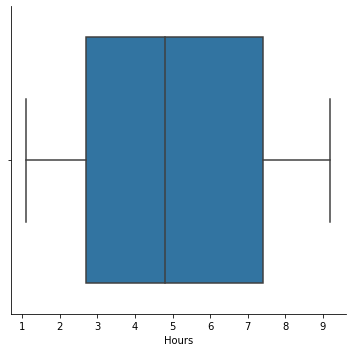

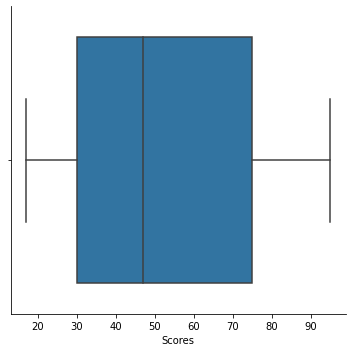

In [26]:
sns.catplot("Hours",data=data,kind="box")
sns.catplot("Scores",data=data,kind="box")

##### No outlier present in the data.

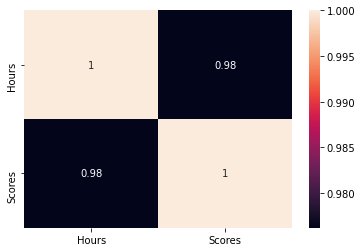

In [27]:
corr=data.corr()
sns.heatmap(corr,annot= True)
plt.show()

##### From above heatmap we says that there is strong positive correlation between Hours and Scores.

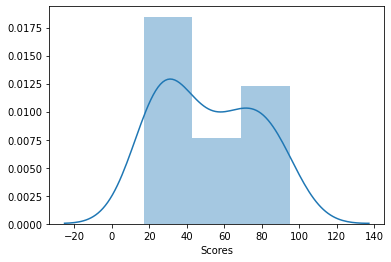

In [30]:
sns.distplot(data["Scores"])

## Preparing the data

In [38]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

## Train Test Split

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [45]:
from sklearn.linear_model import LinearRegression 
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [46]:
print(reg.intercept_)

2.018160041434683


In [47]:
print(reg.coef_)

[9.91065648]


## Making Prediction to the test data

In [50]:
y_pred=reg.predict(x_test)
df=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## Graph of Actual Vs Predicted values

<function matplotlib.pyplot.show(*args, **kw)>

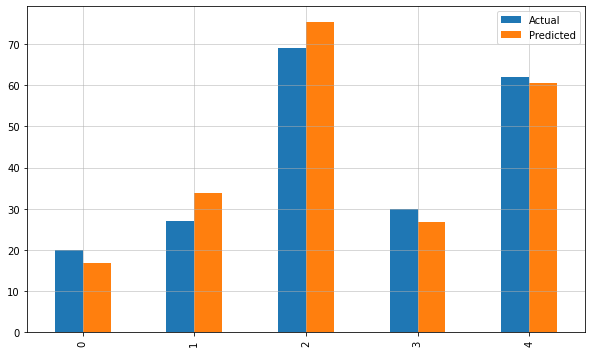

In [54]:
df.plot(kind="bar",figsize=(10,6))
plt.grid(which="major", linestyle="-",linewidth="0.5")
plt.grid(which="minor",linestyle=":",linewidth="0.5")
plt.show

##### From the above graph we says that the predicted percentages are close to the actual values.

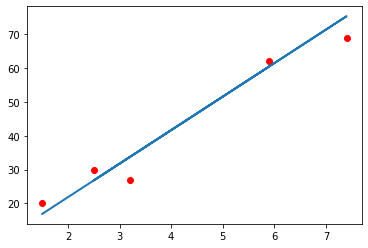

In [55]:
plt.scatter(x_test,y_test,color="red")
plt.plot(x_test,y_pred,linewidth=2)
plt.show()

###### The straight line in the above graph shows our algorithm is correct.

### Predicting a score if a student study 9.25 hrs/day

In [56]:
Hours=9.25
pred=reg.predict([[Hours]])
print("Number 0f hours=",format(Hours))
print("Predicted Score=",format(pred[0]))

Number 0f hours= 9.25
Predicted Score= 93.69173248737538


## Evaluating the Algorithm

In [57]:
from sklearn import metrics
print("Mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared error:",metrics.mean_squared_error(y_test,y_pred))
print("Root mean squared error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean absolute error: 4.183859899002975
Mean squared error: 21.5987693072174
Root mean squared error: 4.6474476121003665


In [58]:
from scipy import stats
slope,inter,r,p,std=stats.linregress(y_test,y_pred)
print("R-squared value:",r)

R-squared value: 0.9806835759589493


##### Here R-squared=0.9806 means the model explain 98.06% of variability in the dependent variable (Scores) by independent variable(Hours).